In [ ]:
import seaborn as sns
import pandas as pandas
df=sns.load_dataset('taxis')
print(df.describe())
print(df.shape)
print(df.info())
df.columns



                              pickup                        dropoff  \
count                           6433                           6433   
mean   2019-03-16 08:31:28.514223616  2019-03-16 08:45:49.491217408   
min              2019-02-28 23:29:03            2019-02-28 23:32:35   
25%              2019-03-08 15:50:34            2019-03-08 16:12:51   
50%              2019-03-15 21:46:58            2019-03-15 22:06:44   
75%              2019-03-23 17:41:38            2019-03-23 17:51:56   
max              2019-03-31 23:43:45            2019-04-01 00:13:58   
std                              NaN                            NaN   

        passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.00000

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [ ]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [ ]:
(df.isna().sum()/df.shape[0])*100

,0
pickup,0.000000
dropoff,0.000000
passengers,0.000000
distance,0.000000
fare,0.000000
tip,0.000000
tolls,0.000000
total,0.000000
color,0.000000
payment,0.683973


In [ ]:
df.shape[0]-df.dropna().shape[0]

92

In [ ]:
df.dropna(inplace=True)          # OK (but returns None) [web:27]
df.reset_index(drop=True, inplace=True)
print(df.shape)


(6341, 14)


In [ ]:
df.tip.value_counts()

,count
tip,
0.00,2244
1.00,312
2.00,211
2.16,89
1.86,79
...,...
11.00,1
10.30,1
8.89,1


In [ ]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


<Axes: xlabel='color', ylabel='tip'>

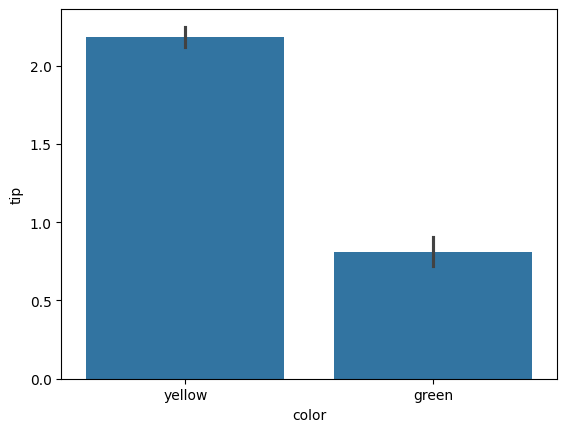

In [ ]:
sns.barplot(x=df.color,y=df.tip,estimator='mean')

<Axes: xlabel='color', ylabel='tip'>

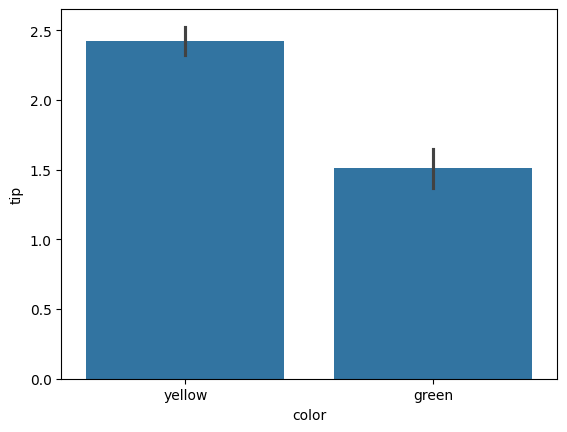

In [ ]:
sns.barplot(x=df.color,y=df.tip,estimator='std')

In [ ]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


<Axes: xlabel='tip', ylabel='Count'>

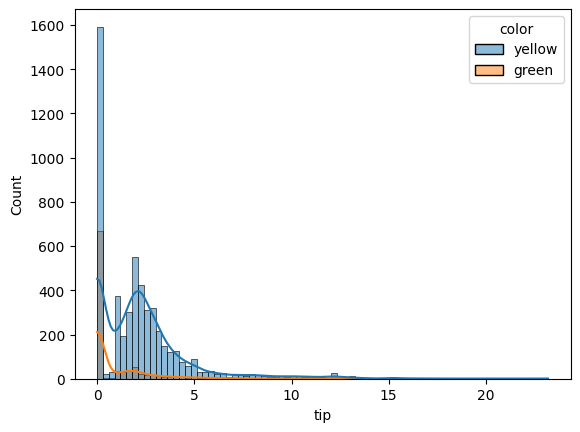

In [ ]:
sns.histplot(x=df.tip,hue=df.color,kde=True)

In [ ]:
# Independent T-Test
import scipy.stats as stats
yellow_tip=df['tip'][df['color']=='yellow']
green_tip=df['tip'][df['color']=='green']



In [ ]:
green_tip.shape

(968,)

In [ ]:
yellow_tip.shape

(5373,)

In [ ]:
t_stat,p_val=stats.ttest_ind(yellow_tip,green_tip)
print("Independent T-Test statistic:",t_stat)
print("P-value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:tip differs by color")
else:
  print("Fail to reject null hypothesis: No significant tip difference by color")

Independent T-Test statistic: 17.05932566128597
P-value: 7.791088119489451e-64
Reject null hypothesis:tip differs by color


In [ ]:

df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


In [ ]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


<Axes: xlabel='payment', ylabel='tip'>

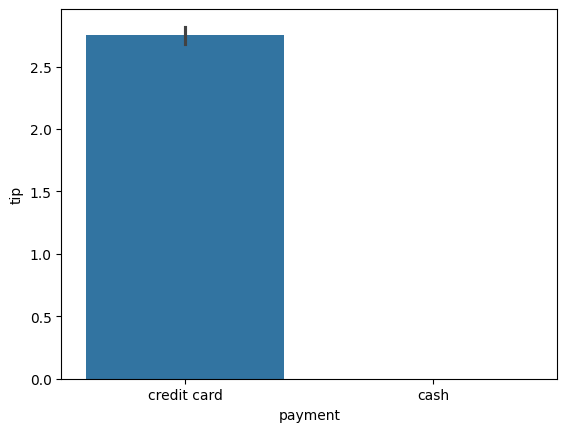

In [ ]:
sns.barplot(x=df.payment,y=df.tip,estimator='mean')

<Axes: xlabel='payment', ylabel='tip'>

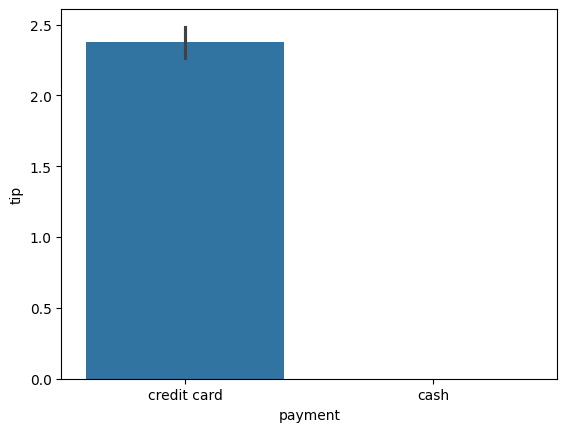

In [ ]:
sns.barplot(x=df.payment,y=df.tip,estimator='std')

<Axes: xlabel='tip', ylabel='Count'>

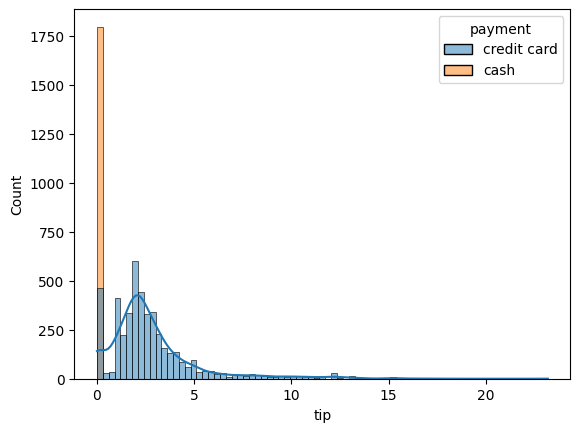

In [ ]:
sns.histplot(x=df.tip,hue=df.payment,kde=True)

In [ ]:
credit_tip=df['tip'][df['payment']=='credit card']
cash_tip=df['tip'][df['payment']=='cash']
t_stat,p_val=stats.ttest_ind(credit_tip,cash_tip)
print("Independent T-Test statistic:",t_stat)
print("P-value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:tip differs by payment")
else:
  print("Fail to reject null hypothesis: No significant tip difference by payment")

Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis:tip differs by payment


In [ ]:
# Customers tend to tip more when they pay by credit card compared to cash.

# Tips are generally higher for credit card payments, while cash payments usually have lower average tips.

In [ ]:
df.pickup_zone.value_counts()

,count
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Clinton East,208
Upper East Side South,208
Midtown East,196
...,...
Ozone Park,1
Glendale,1
Woodlawn/Wakefield,1


<Axes: xlabel='pickup_zone', ylabel='tip'>

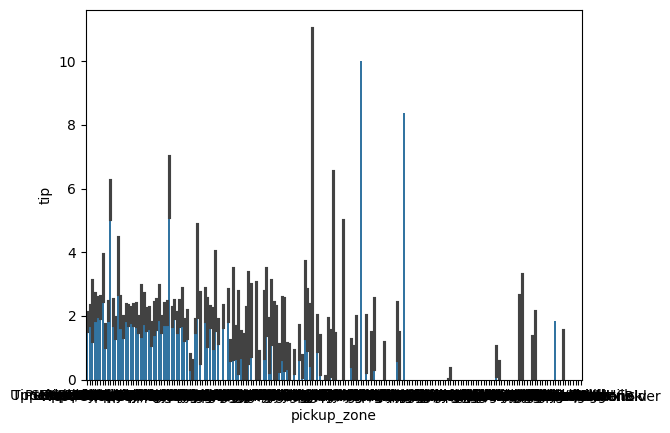

In [ ]:
sns.barplot(x=df.pickup_zone,y=df.tip,estimator='mean')

In [ ]:

# sns.histplot(x=df.tip,hue=df.pickup_zone,kde=True)

In [ ]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


In [ ]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

<Axes: xlabel='pickup_borough', ylabel='count'>

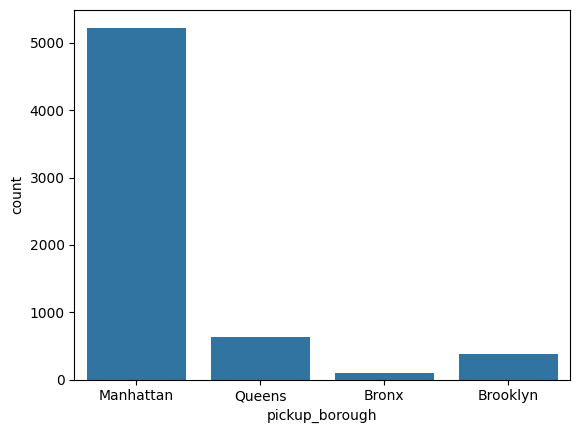

In [ ]:
sns.countplot(x=df['pickup_borough'])

/tmp/ipython-input-22238045.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.pickup_borough,y=df.tip,palette='Set2',estimator='std')


<Axes: xlabel='pickup_borough', ylabel='tip'>

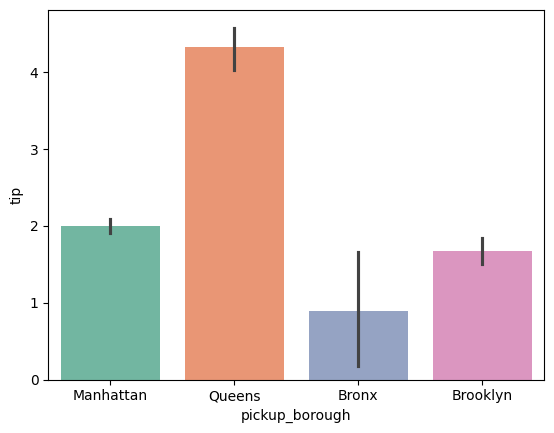

In [ ]:
sns.barplot(x=df.pickup_borough,y=df.tip,palette='Set2',estimator='std')

In [ ]:
df['tip'].groupby(df['pickup_borough']).mean()

,tip
pickup_borough,
Bronx,0.148586
Brooklyn,0.979127
Manhattan,1.945597
Queens,3.066458


In [ ]:
df['tip'].groupby(df['pickup_borough']).std()

,tip
pickup_borough,
Bronx,0.897261
Brooklyn,1.674487
Manhattan,1.997736
Queens,4.323951


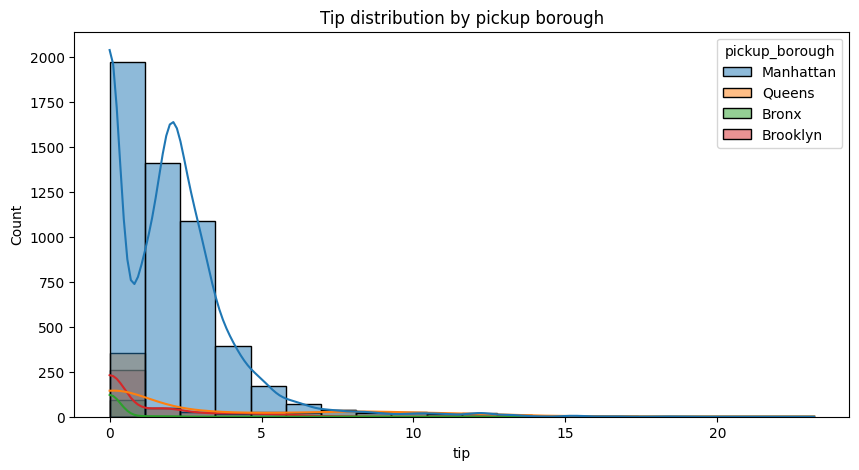

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="tip", hue="pickup_borough", bins=20, kde=True, )
plt.title("Tip distribution by pickup borough")
plt.show()

In [ ]:
manhattan_tip=df['tip'][df['pickup_borough']=='Manhattan']
queens_tip=df['tip'][df['pickup_borough']=='Queens']
bronx_tip=df['tip'][df['pickup_borough']=='Bronx']
brooklyn_tip=df['tip'][df['pickup_borough']=='Brooklyn']
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("P value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:tip differs by borough")
else:
  print("Fail to reject null hypothesis: No significant tip difference by borough")

P value: 5.155109332422435e-58
Reject null hypothesis:tip differs by borough


In [ ]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # Prepare data
# spending_scores = data['Spending_Score']
# regions = data['Region']
#h0=distribution of group 1= group 2
#h1=distribution of g1 is not equal to group 2

# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.pickup_borough, alpha=0.05)
print(tukey_result)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


<Axes: xlabel='dropoff_borough', ylabel='count'>

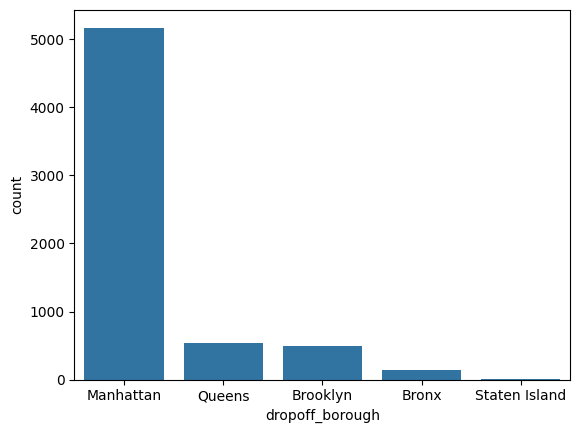

In [ ]:
sns.countplot(x=df['dropoff_borough'])

/tmp/ipython-input-705138468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.dropoff_borough,y=df.tip,palette='Set2',estimator='std')


<Axes: xlabel='dropoff_borough', ylabel='tip'>

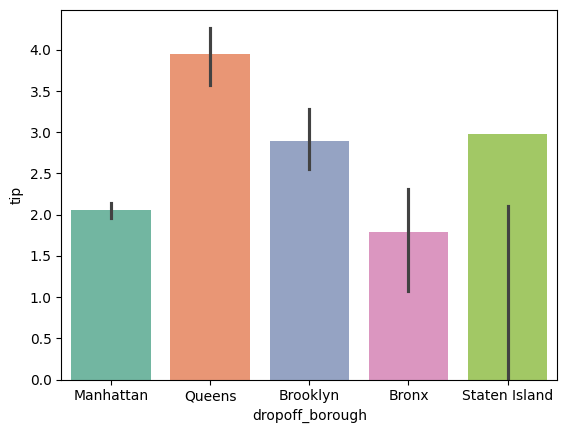

In [ ]:
sns.barplot(x=df.dropoff_borough,y=df.tip,palette='Set2',estimator='std')

In [ ]:
print(df['tip'].groupby(df['dropoff_borough']).mean())
df['tip'].groupby(df['dropoff_borough']).std()

dropoff_borough
Bronx             0.534706
Brooklyn          1.921590
Manhattan         1.964321
Queens            2.422022
Staten Island    14.165000
Name: tip, dtype: float64


,tip
dropoff_borough,
Bronx,1.788795
Brooklyn,2.896229
Manhattan,2.052074
Queens,3.947016
Staten Island,2.976920


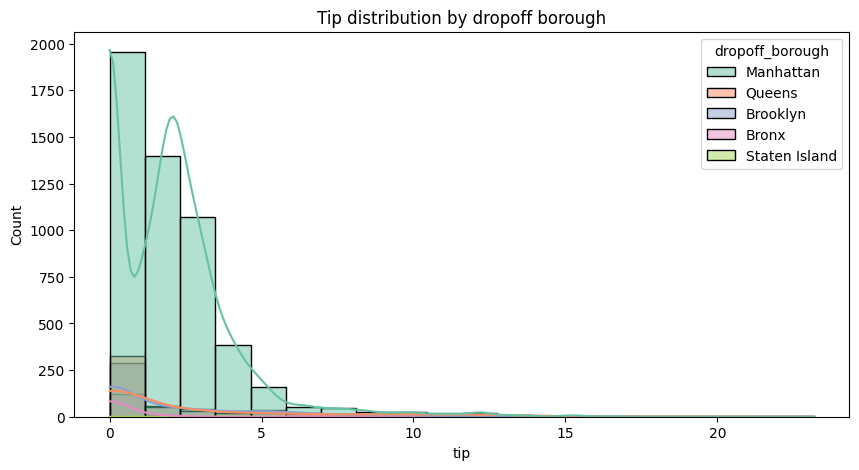

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="tip", hue="dropoff_borough",palette='Set2',bins=20, kde=True )
plt.title("Tip distribution by dropoff borough")
plt.show()

In [ ]:
manhattan_tip=df['tip'][df['dropoff_borough']=='Manhattan']
queens_tip=df['tip'][df['dropoff_borough']=='Queens']
bronx_tip=df['tip'][df['dropoff_borough']=='Bronx']
brooklyn_tip=df['tip'][df['dropoff_borough']=='Brooklyn']
staten_island_tip=df['tip'][df['dropoff_borough']=='Staten Island']
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip,staten_island_tip)
print("F-statistic:",f_stat)
print("P value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:tip differs by dropoff borough")
else:
  print("Fail to reject null hypothesis: No significant tip difference by dropoff borough")

F-statistic: 31.42417796696829
P value: 5.87859571331583e-26
Reject null hypothesis:tip differs by dropoff borough


In [ ]:
print(df.pickup_zone.value_counts())
df.dropoff_zone.value_counts()

pickup_zone
Midtown Center                  227
Penn Station/Madison Sq West    209
Clinton East                    208
Upper East Side South           208
Midtown East                    196
                               ... 
Ozone Park                        1
Glendale                          1
Woodlawn/Wakefield                1
West Farms/Bronx River            1
Hillcrest/Pomonok                 1
Name: count, Length: 194, dtype: int64


,count
dropoff_zone,
Upper East Side North,244
Murray Hill,217
Midtown Center,215
Midtown East,175
Upper East Side South,173
...,...
Queensboro Hill,1
Homecrest,1
Madison,1


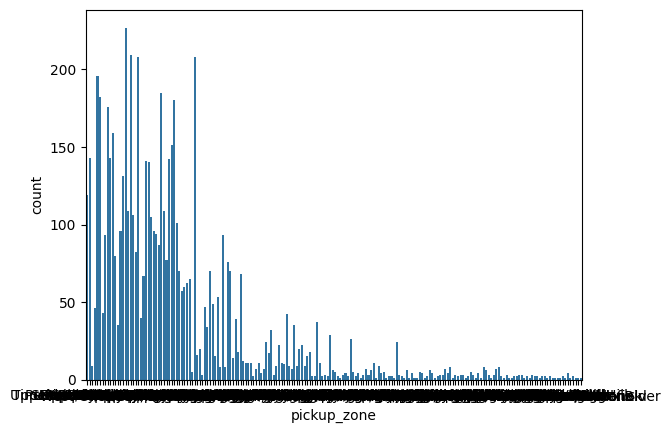

In [ ]:
sns.countplot(x=df['pickup_zone'])
plt.show()

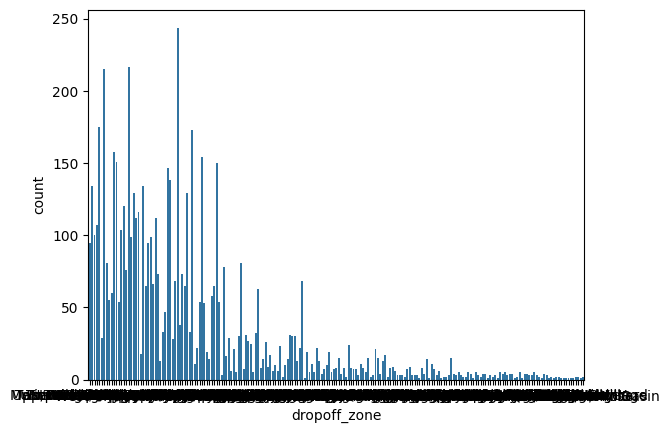

In [ ]:
sns.countplot(x=df['dropoff_zone'])
plt.show()

In [ ]:
regions = [group['tip'].values for name, group in df.groupby('pickup_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by pickup_zone")
else:

    print("Fail to reject null hypothesis: No significant difference by pickup_zone")



ANOVA F-statistic: 7.563376210961916
P-value: 7.892434822136223e-169
Reject null hypothesis: tip differs by pickup_zone


In [ ]:
regions = [group['tip'].values for name, group in df.groupby('dropoff_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by dropoff_zone")
else:

    print("Fail to reject null hypothesis: No significant difference by dropoff_zone")



ANOVA F-statistic: 5.76903467327541
P-value: 1.3107168403745948e-120
Reject null hypothesis: tip differs by dropoff_zone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

<Axes: xlabel='tip', ylabel='Count'>

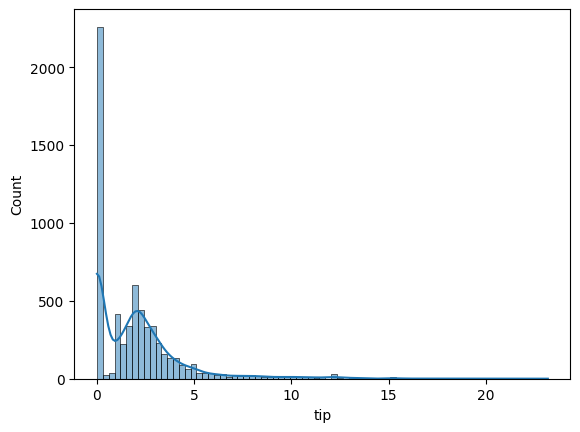

In [ ]:
sns.histplot(df['tip'],kde=True)

<Axes: xlabel='passengers', ylabel='Count'>

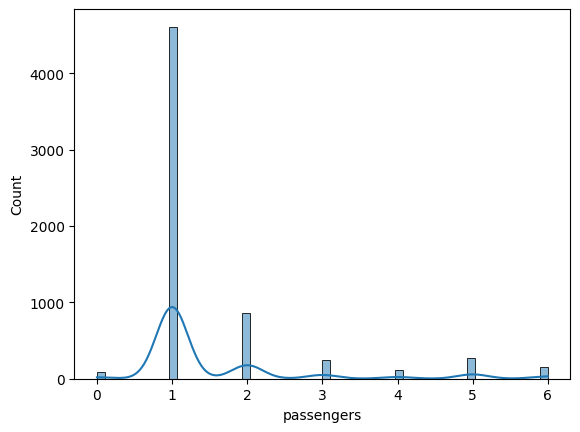

In [ ]:
sns.histplot(df['passengers'],kde=True)

<Axes: xlabel='passengers', ylabel='tip'>

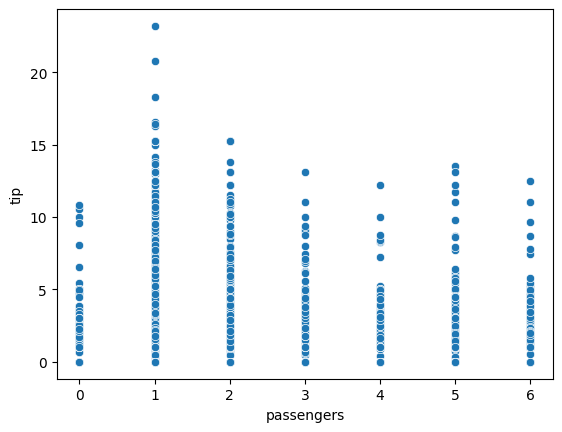

In [ ]:
sns.scatterplot(y=df.tip,x=df.passengers)

In [ ]:
r,p_val=stats.spearmanr(df['tip'],df['passengers'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.027509812818779178
p_value: 0.028480753176042872
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: xlabel='fare', ylabel='Count'>

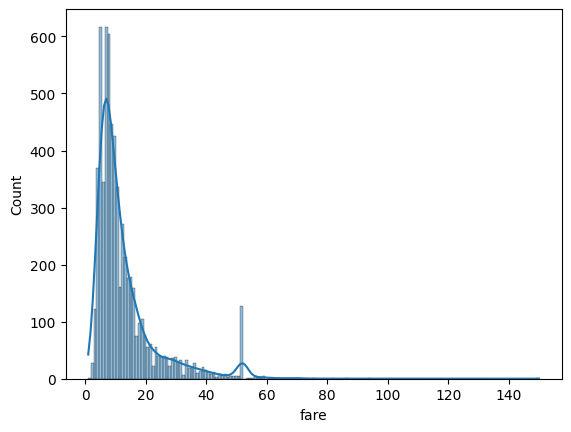

In [ ]:
sns.histplot(df['fare'],kde=True)

<Axes: xlabel='fare', ylabel='tip'>

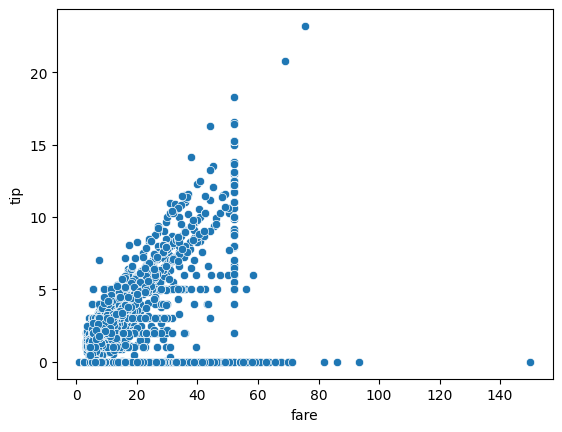

In [ ]:
sns.scatterplot(y=df.tip,x=df.fare)

In [ ]:
r,p_val=stats.spearmanr(df['tip'],df['fare'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.310254279563729
p_value: 1.5556730728881364e-141
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: xlabel='distance', ylabel='Count'>

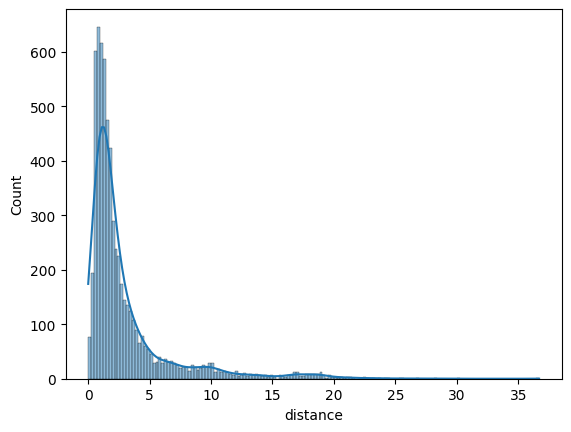

In [ ]:
sns.histplot(df['distance'],kde=True)

<Axes: xlabel='distance', ylabel='tip'>

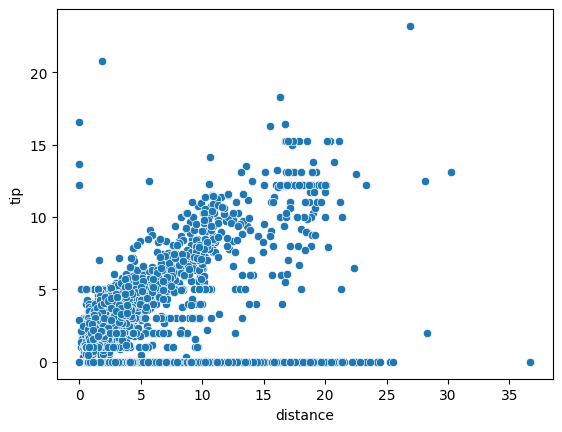

In [ ]:
sns.scatterplot(y=df.tip,x=df.distance)

In [ ]:
r,p_val=stats.spearmanr(df['tip'],df['distance'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.29265085410043695
p_value: 1.9411181331374707e-125
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: xlabel='tolls', ylabel='Count'>

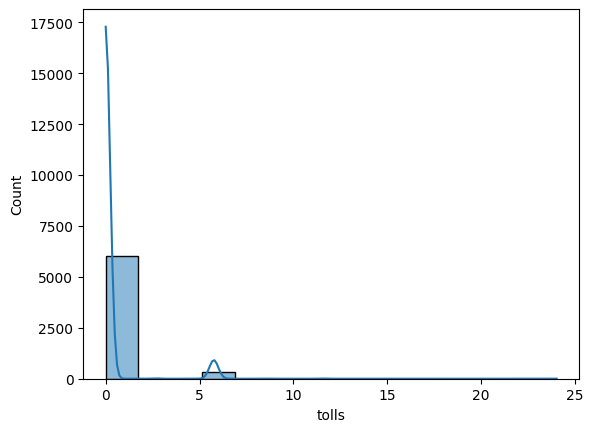

In [ ]:
sns.histplot(df['tolls'],kde=True)

<Axes: xlabel='tolls', ylabel='tip'>

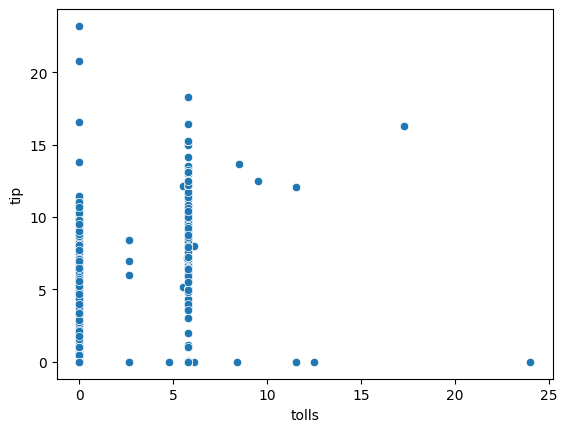

In [ ]:
sns.scatterplot(y=df.tip,x=df.tolls)

In [ ]:
r,p_val=stats.spearmanr(df['tip'],df['tolls'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.175380002891528
p_value: 5.643276180955435e-45
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: xlabel='total', ylabel='Count'>

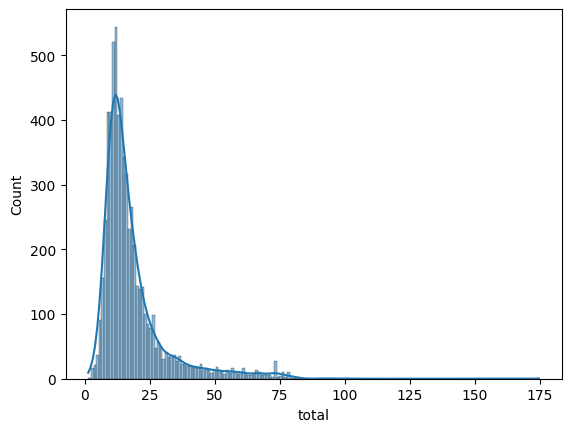

In [ ]:
sns.histplot(df['total'],kde=True)

<Axes: xlabel='total', ylabel='tip'>

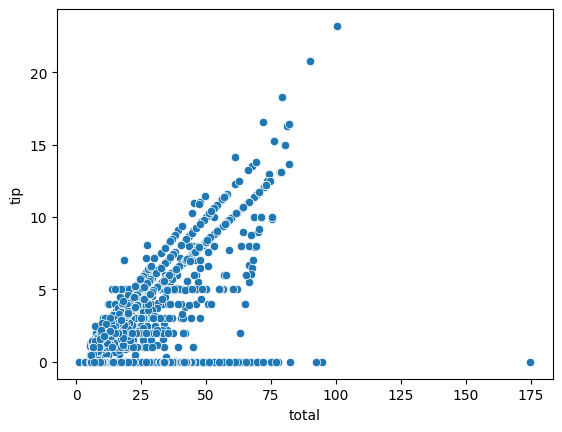

In [ ]:
sns.scatterplot(x=df.total,y=df.tip)

In [ ]:
r,p_val=stats.spearmanr(df['tip'],df['total'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.5028299699182296
p_value: 0.0
Reject null hypothesis:correlation is zero or there is no relationship b/w them
